#Importing modules

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Reading CSV and performing basic EDA functions

In [ ]:
df = pd.read_csv("/content/churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:

df.groupby('Churn').mean()

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,0.128721,37.569965,61.265124
Yes,0.254682,17.979133,74.441332


In [ ]:

df.groupby('Churn')

#Visualising Data using Bar Graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


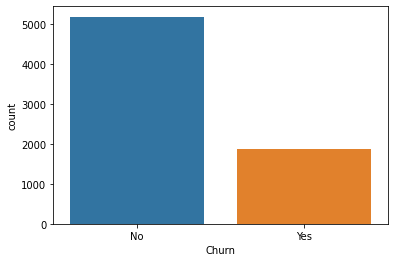

In [ ]:
sns.countplot(df['Churn'])

In [ ]:
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned) * 100,'% of customers stayed in the company')
# peint the percentage of customers that left
print(numChurned/(numRetained + numChurned) * 100, '% of customers left with the company')

73.4630129206304 % of customers stayed in the company
26.536987079369588 % of customers left with the company


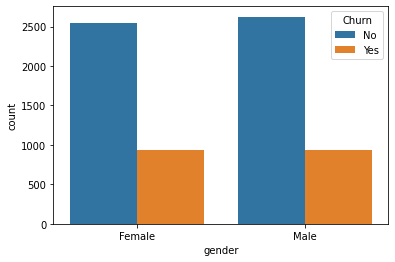

In [ ]:
sns.countplot(x ='gender', hue='Churn', data=df)

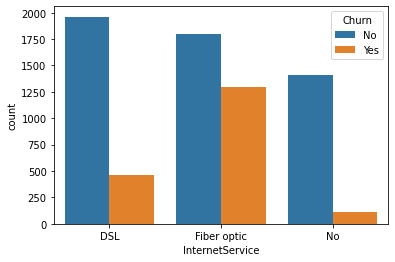

In [ ]:
sns.countplot(x='InternetService', hue='Churn', data=df)

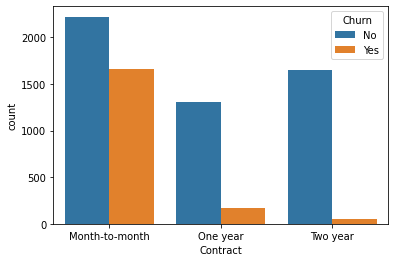

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)

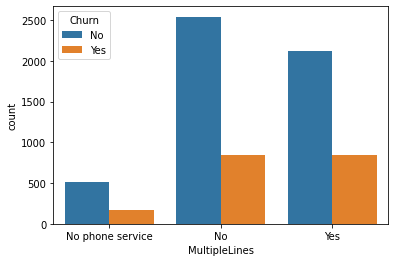

In [ ]:
sns.countplot(x='MultipleLines', hue='Churn', data=df)

#Plotting Histographs


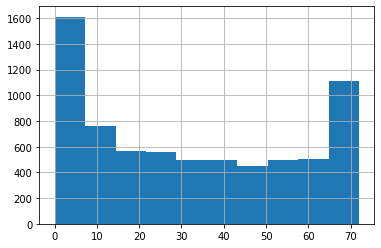

In [ ]:
df["tenure"].hist()

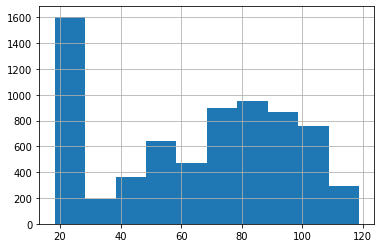

In [ ]:
df["MonthlyCharges"].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f710d07df50>,
      dtype=object)

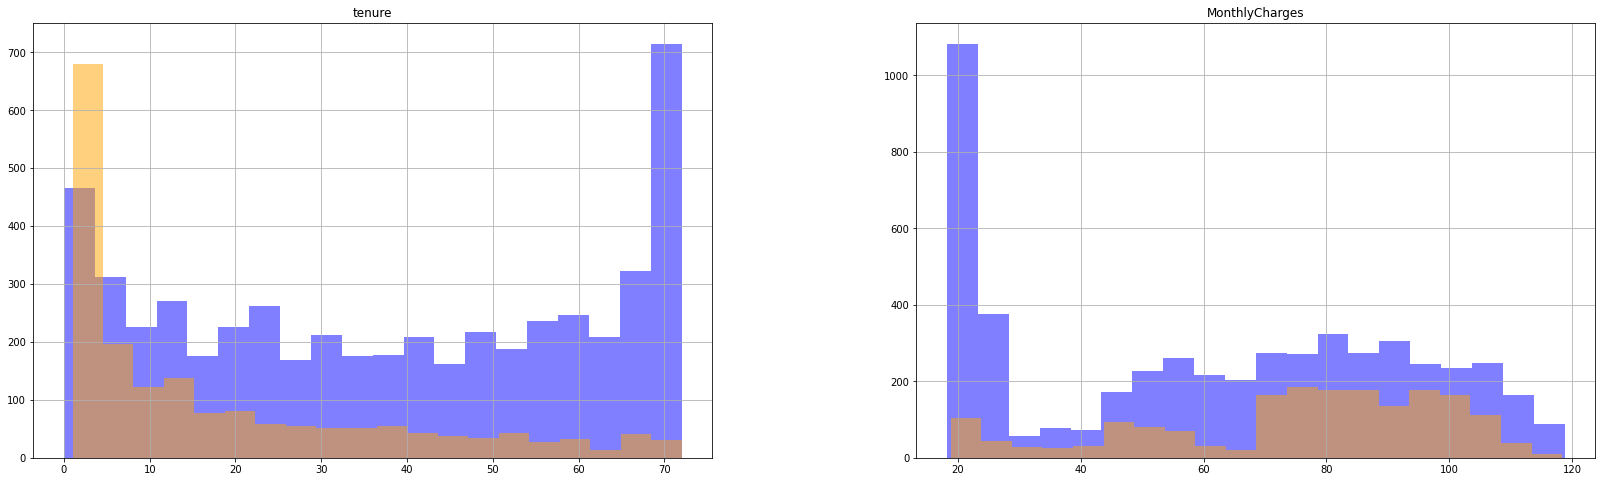

In [ ]:
numericFeatures = ['tenure', 'MonthlyCharges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

#Scaling the data

In [ ]:
cleanDF = df.drop('customerID', axis=1)


In [ ]:
#Convert all the non-numeric columns to numeric
for column in cleanDF.columns:
  if cleanDF[column].dtype == np.number:
    continue
  cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cleanDF.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [ ]:
x = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']
x = StandardScaler().fit_transform(x)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

#Creating a heatmap



In [ ]:
import seaborn as sb


In [ ]:
df = df.replace({'Churn': {'Yes': 1, 'No': 0}})

In [ ]:
df = df.replace({'PhoneService': {'Yes': 1, 'No': 0}})
df = df.replace({'OnlineSecurity': {'Yes': 1, 'No': 0}})
df = df.replace({'DeviceProtection': {'Yes': 1, 'No': 0}})
df = df.replace({'TechSupport': {'Yes': 1, 'No': 0}})
df = df.replace({'StreamingMovies': {'Yes': 1, 'No': 0}})
df = df.replace({'PaperlessBilling': {'Yes': 1, 'No': 0}})
df = df.replace({'Partner': {'Yes': 1, 'No': 0}})
df = df.replace({'Dependents': {'Yes': 1, 'No': 0}})

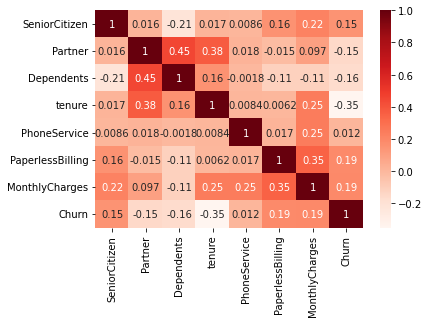

In [ ]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Reds", annot=True)

#Applying Logistic Regression

In [ ]:
model = LogisticRegression()
# Train the model
model.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
predictions = model.predict(xtest)

# print the predictions
print(predictions)

[1 0 0 ... 0 0 0]


In [ ]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


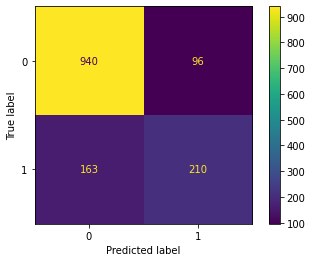

In [ ]:
#Confusion Matrix
model = LogisticRegression()
model.fit(xtrain, ytrain)
plot_confusion_matrix(model, xtest, ytest)  
plt.show()

#Applying Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model2 = GaussianNB()

In [ ]:
model2.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
predictions = model2.predict(xtest)

# print the predictions
print(predictions)

[1 0 0 ... 0 0 1]


In [ ]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1036
           1       0.53      0.77      0.63       373

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


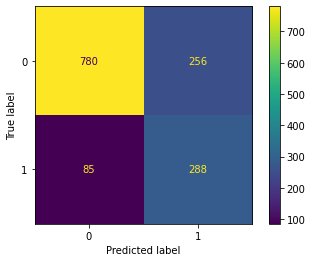

In [ ]:

model2.fit(xtrain, ytrain)
plot_confusion_matrix(model2, xtest, ytest)  
plt.show()

#Applying Support Vector Classification

In [ ]:
from sklearn.svm import SVC

In [ ]:
model3 = SVC()

In [ ]:
model3.fit(xtrain, ytrain)

SVC()

In [ ]:
predictions = model3.predict(xtest)

# print the predictions
print(predictions)

[1 0 0 ... 0 0 0]


In [ ]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.70      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


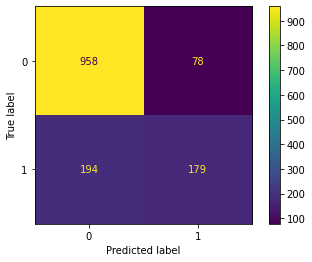

In [ ]:
model3.fit(xtrain, ytrain)
plot_confusion_matrix(model3, xtest, ytest)  
plt.show()

#Comparing the 3 models

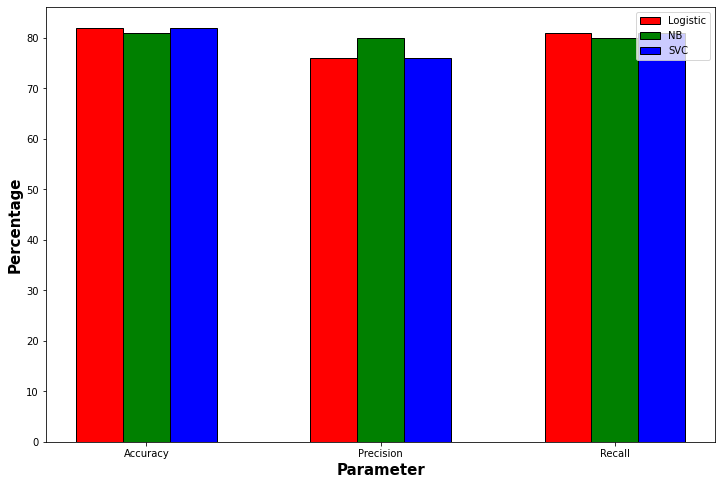

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
Accuracy = [82,76,81]
Precision = [81,80,80]
Recall = [82,76,81]
F1_Score=[81,77,79]
 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

 
# Make the plot
plt.bar(br1, Accuracy, color ='r', width = barWidth,
        edgecolor ='black', label ='Logistic')
plt.bar(br2, Precision, color ='g', width = barWidth,
        edgecolor ='black', label ='NB')
plt.bar(br3, Recall, color ='b', width = barWidth,
        edgecolor ='black', label ='SVC')


 
# Adding Xticks
plt.xlabel('Parameter', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentage', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        ['Accuracy', 'Precision', 'Recall','F1 Score'])
 
plt.legend()
plt.show()